In [1]:
# Set project directory
import os
import sys


def project_dir():
    notebook_path = %pwd
    repo_name = "worldbank_data_exploration"
    repo_folder = notebook_path.split(repo_name)[0]
    return os.path.join(repo_folder, repo_name)


pwd = os.getenv("PWD", project_dir())
os.environ["PWD"] = pwd
sys.path.append(pwd)

In [2]:
from data_sources.load_dataset import load_time_series, load_dataset
import pandas as pd


ts, countries, years = load_time_series()
print(len(ts))
print(countries.shape)
print(years.shape)

15
(126,)
(21,)


/home/grela/PycharmProjects/worldbank_data_exploration/venv/lib/python3.9/site-packages/numpy/core/getlimits.py:499: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/grela/PycharmProjects/worldbank_data_exploration/venv/lib/python3.9/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  return self._float_to_str(self.smallest_subnormal)


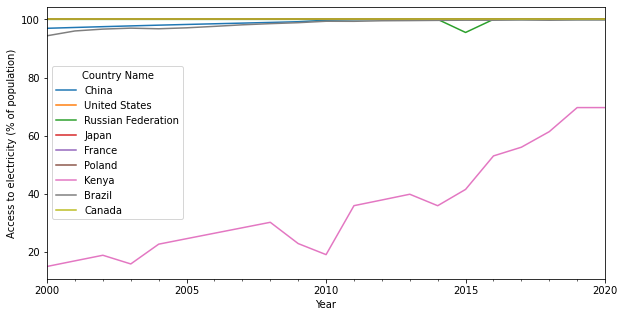

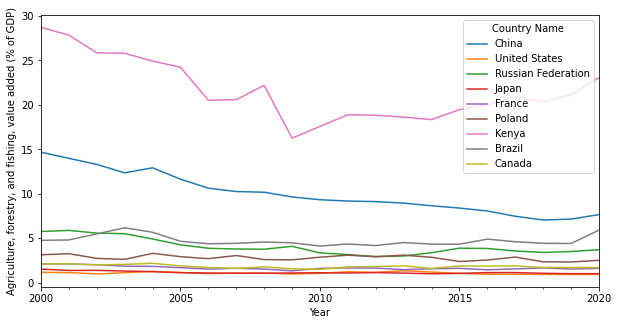

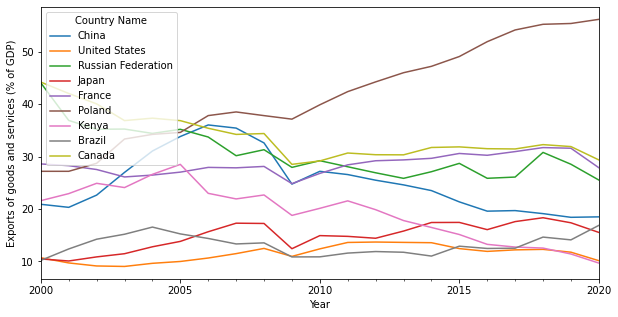

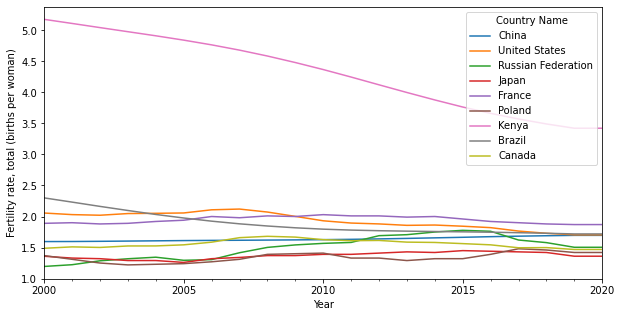

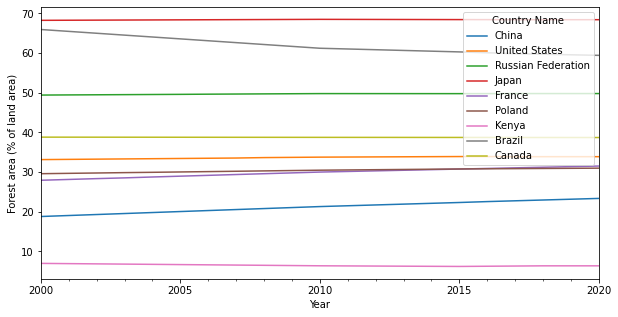

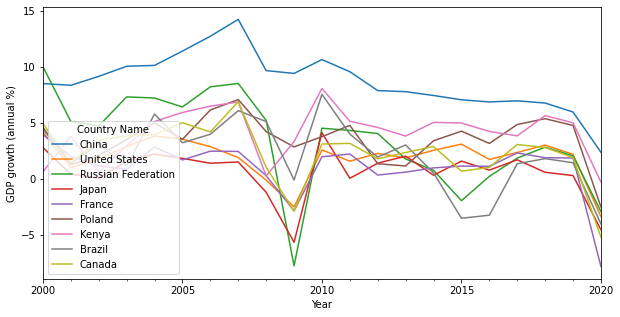

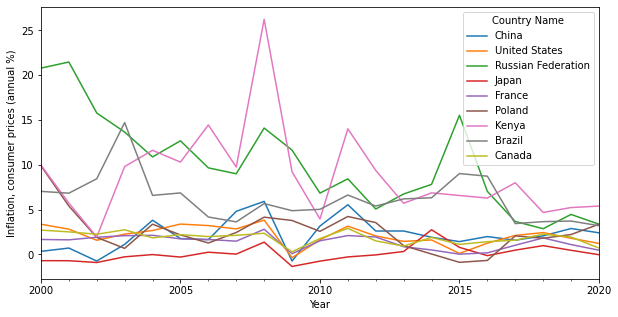

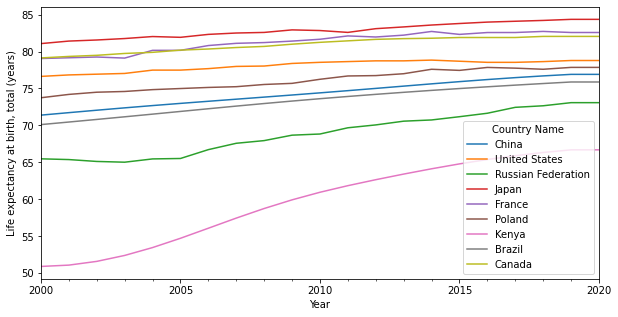

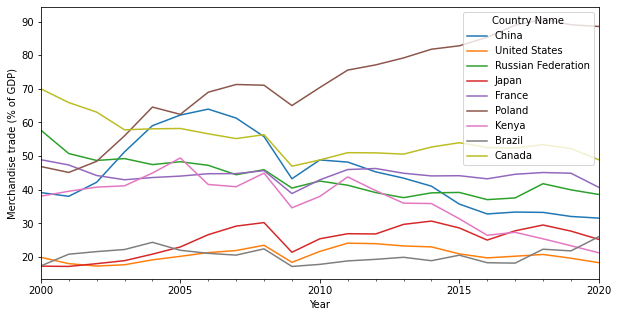

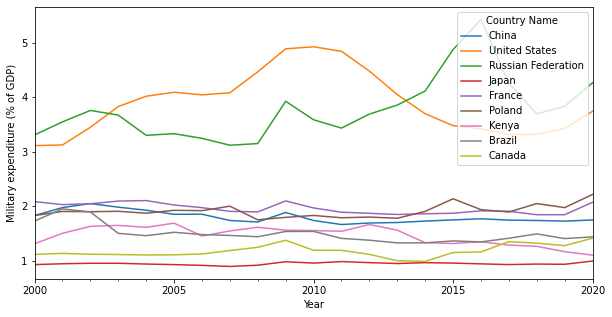

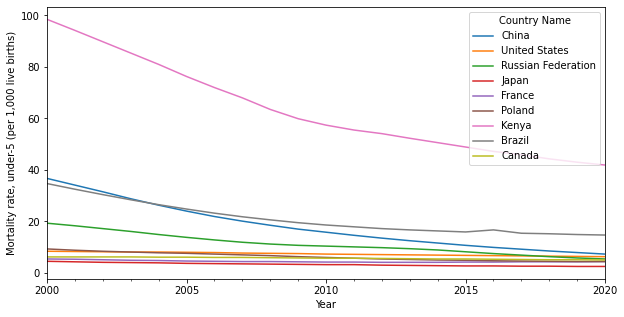

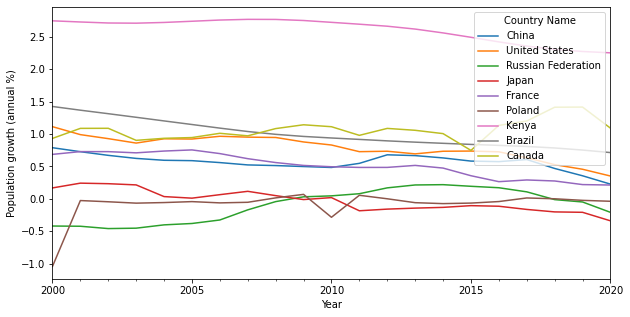

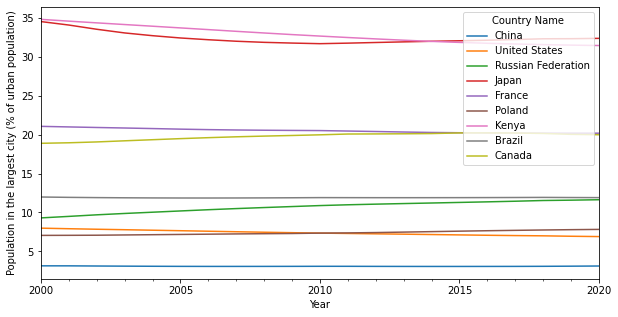

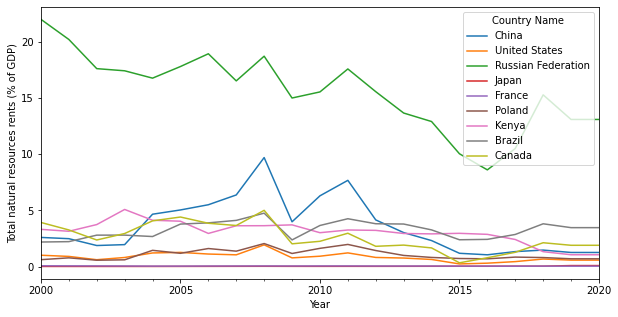

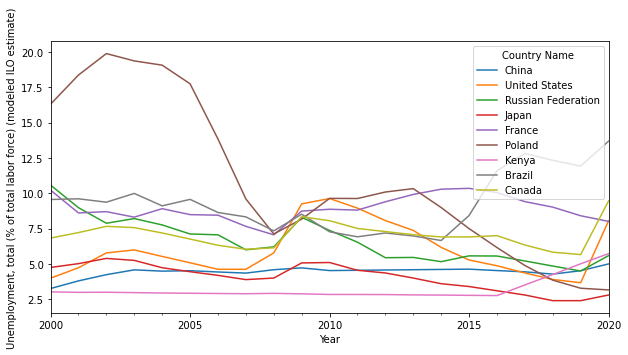

In [3]:
dataset = load_dataset()
countries = [
    "China",
    "United States",
    "Russian Federation",
    "Japan",
    "France",
    "Poland",
    "Kenya",
    "Brazil",
    "Canada",
]
for col in dataset.columns.values:
    data_to_visualize = dataset[col].unstack().loc[:, countries]
    data_to_visualize.index = pd.to_datetime(
        data_to_visualize.index.astype(str), format="%Y"
    )
    data_to_visualize.plot(figsize=(10, 5), ylabel=col)